In [7]:
import SimpleITK as sitk
import sys

from clinical_evaluation.utils import ops, visualizer
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm

In [8]:
patient_matrix_dict_sct = {
    "P0439C0006I13369619": [
        [    1,   0.01,   0.02,    -1.06],
        [-0.01,    1.0,      0,  -157.72],
        [-0.02,      0,      1,    23.68]
    ], # 1
    "P0439C0006I13361557": [
        [    1,   0.03,   0.02,     0.25],
        [-0.03,      1,  -0.01,  -120.97],
        [-0.02,   0.01,      1,    19.55]
    ], # 2
    "P0439C0006I13368284": [
        [    1,   0.02,   0.01,    -4.16],
        [-0.02,      1,  -0.01,  -128.52],
        [-0.01,   0.01,      1,    20.54]
    ], # 3
    "P0439C0006I13369049": [
        [    1,  -0.01,      0,    -1.85],
        [ 0.01,      1,   0.02,  -126.16],
        [    0,  -0.02,      1,    22.30]
    ], # 4
    "P0439C0006I13369293": [
        [    1,   0.03,   0.01,    -0.12],
        [-0.03,      1,  -0.01,  -125.03],
        [-0.01,   0.01,      1,    19.88]
    ], # 5
    "P0439C0006I13369204": [
        [    1,  -0.01,      0,     0.41],
        [ 0.01,      1,   0.01,  -182.47],
        [    0,  -0.01,      1,       26]
    ], # 6
    "P0439C0006I13369085": [
        [    1,      0,   0.01,    -0.71],
        [    0,      1,      0,  -127.88],
        [-0.01,      0,      1,    20.73]
    ], # 7
    "P0439C0006I13368985": [
        [    1,      0,      0,    -1.79],
        [    0,      1,  -0.01,  -123.26],
        [    0,   0.01,      1,    20.48]
    ], # 8
    "P0439C0006I13368798": [
        [    1,   0.06,      0,    -8.32],
        [-0.06,      1,  -0.03,  -124.38],
        [    0,   0.03,      1,    19.05]
    ], # 9
    "P0439C0006I13368543": [
        [    1,  -0.02,   0.01,     6.07],
        [ 0.02,      1,  -0.02,  -128.88],
        [-0.01,   0.02,      1,    18.80]
    ], # 10
    "P0439C0006I13368541": [
        [    1,   0.01,   0.01,    -5.29],
        [-0.01,      1,   0.01,  -119.24],
        [-0.01,  -0.01,      1,    21.02]
    ], # 11
    "P0439C0006I13367565": [
        [    1,      0,   0.02,    -0.35],
        [ 0.01,      1,  -0.01,  -128.06],
        [-0.02,   0.01,      1,    19.88]
    ], # 12
    "P0439C0006I13368237": [
        [    1,   0.01,  -0.01,     1.67],
        [-0.01,      1,   0.01,  -123.44],
        [ 0.01,  -0.01,      1,    21.60]
    ], # 13
    "P0439C0006I13368195": [
        [    1,   0.01,      0,    -0.46],
        [-0.01,      1,  -0.01,  -138.50],
        [    0,   0.01,      1,    23.25]
    ], # 14
    "P0439C0006I13367986": [
        [    1,  -0.06,   0.03,     9.16],
        [ 0.06,      1,  -0.01,  -115.00],
        [-0.03,   0.01,      1,    19.83]
    ], # 15
    "P0439C0006I13367923": [
        [    1,   0.07,   0.01,   -11.81],
        [-0.07,      1,  -0.02,  -129.64],
        [-0.01,   0.02,      1,    19.39]
    ], # 16
    "P0439C0006I13367924": [
        [    1,      0,      0,    -1.82],
        [    0,      1,  -0.02,  -125.10],
        [    0,   0.02,      1,    18.85]
    ], # 17
    "P0439C0006I13367522": [
        [    1,   0.02,      0,    -1.95],
        [-0.02,      1,  -0.01,  -158.94],
        [    0,   0.01,      1,    23.55]
    ], # 18
    "P0439C0006I13367533": [
        [    1,  -0.02,   0.01,     4.13],
        [ 0.02,      1,   0.01,  -124.91],
        [-0.01,  -0.01,      1,    21.99]
    ], # 19
    "P0439C0006I13365702": [
        [    1,  -0.04,  -0.01,    -2.23],
        [ 0.04,      1,   0.01,   156.87],
        [ 0.01,  -0.01,      1,   -24.72]
    ], # 20  # !!!! this one is not inverted, they registered CT to CBCT in this case
    
}

In [9]:
patient_matrix_dict_cbct = {
    "P0439C0006I13369619": [
        [    1,   0.01,   0.02,    -1.52],
        [-0.01,    1.0,      0,  -157.72],
        [-0.02,      0,      1,    23.33]
    ], # 1
    "P0439C0006I13361557": [
        [    1,   0.03,   0.02,     0.52],
        [-0.03,      1,  -0.02,  -120.86],
        [-0.02,   0.02,      1,    19.33]
    ], # 2
    "P0439C0006I13368284": [
        [    1,   0.02,   0.01,    -4.28],
        [-0.02,      1,  -0.01,  -128.52],
        [-0.01,   0.01,      1,    20.38]
    ], # 3
    "P0439C0006I13369049": [
        [    1,  -0.01,      0,    -1.70],
        [ 0.01,      1,   0.02,  -126.22],
        [    0,  -0.02,      1,    22.28]
    ], # 4
    "P0439C0006I13369293": [
        [    1,   0.03,   0.01,    -0.21],
        [-0.03,      1,  -0.01,  -125.16],
        [-0.01,   0.01,      1,    19.75]
    ], # 5
    "P0439C0006I13369204": [
        [    1,   0.01,    0.01,   -1.17],
        [-0.01,      1,   0.02,  -182.39],
        [    0,  -0.02,      1,    26.20]
    ], # 6
    "P0439C0006I13369085": [
        [    1,      0,   0.01,    -0.75],
        [    0,      1,      0,  -127.83],
        [-0.01,      0,      1,    20.84]
    ], # 7
    "P0439C0006I13368985": [
        [    1,      0,      0,    -1.85],
        [    0,      1,  -0.01,  -123.19],
        [    0,   0.01,      1,    20.42]
    ], # 8
    "P0439C0006I13368798": [
        [    1,   0.06,      0,    -8.13],
        [-0.06,      1,  -0.01,  -124.23],
        [    0,   0.01,      1,    20.68]
    ], # 9
    "P0439C0006I13368543": [
        [    1,  -0.03,   0.01,     6.18],
        [ 0.03,      1,  -0.02,  -128.68],
        [-0.01,   0.02,      1,    18.99]
    ], # 10
    "P0439C0006I13368541": [
        [    1,   0.01,   0.01,    -5.32],
        [-0.01,      1,   0.01,  -119.27],
        [-0.01,  -0.01,      1,    21.27]
    ], # 11
    "P0439C0006I13367565": [
        [    1,      0,   0.02,    -0.46],
        [ 0.01,      1,  -0.01,  -128.04],
        [-0.02,   0.01,      1,    19.68]
    ], # 12
    "P0439C0006I13368237": [
        [    1,   0.01,  -0.01,     1.64],
        [-0.01,      1,   0.01,  -123.44],
        [ 0.01,  -0.01,      1,    21.52]
    ], # 13
    "P0439C0006I13368195": [
        [    1,   0.01,      0,    -0.37],
        [-0.01,      1,  -0.01,  -138.55],
        [    0,   0.01,      1,    23.02]
    ], # 14
    "P0439C0006I13367986": [
        [    1,  -0.05,   0.02,     8.61],
        [ 0.05,      1,  -0.01,  -115.05],
        [-0.02,   0.01,      1,    19.81]
    ], # 15
    "P0439C0006I13367923": [
        [    1,   0.07,   0.01,   -11.83],
        [-0.07,      1,  -0.03,  -129.49],
        [-0.01,   0.02,      1,    19.19]
    ], # 16
    "P0439C0006I13367924": [
        [    1,      0,      0,    -1.76],
        [    0,      1,  -0.02,  -125.11],
        [    0,   0.02,      1,    18.96]
    ], # 17
    "P0439C0006I13367522": [
        [    1,   0.02,      0,    -1.74],
        [-0.02,      1,  -0.01,  -159.00],
        [    0,   0.01,      1,    23.50]
    ], # 18
    "P0439C0006I13367533": [
        [    1,  -0.02,   0.01,     4.08],
        [ 0.02,      1,   0.01,  -124.87],
        [-0.01,  -0.01,      1,    21.60]
    ], # 19
    "P0439C0006I13365702": [
        [    1,   0.01,      0,    -1.44],
        [-0.01,      1,  -0.02,  -157.16],
        [    0,   0.02,      1,    22.68]
    ], # 20
    
}

In [10]:
def _change_orientation(sitk_image, orient="LPS"):
    """
    Changes the underlying data array to desired orientation by changing the 
    Direction of the SITK Image
    """
    curr_filter = sitk.DICOMOrientImageFilter()
    curr_filter.SetDesiredCoordinateOrientation(orient)
    sitk_image = curr_filter.Execute(sitk_image)
    return sitk_image

def register_using_raystation_matrix(CBCT, CT, matrix, invert_transform=False):
    # Change orientation to LSA as that's what RayStation looks at.
    CT = _change_orientation(CT, orient="LSA")
    CBCT = _change_orientation(CBCT, orient="LSA")
    
    matrix = np.array(matrix)
    
    translation_offset = matrix[:, 3]
    rotation_matrix = matrix[:, :-1]


    dimension = CT.GetDimension()
    # Translation needs to be handled separately even if orientation is changed as it is not a part of sitk
    # transformations applied to base-coordinate system: 
    #Refer: https://simpleitk.readthedocs.io/en/master/fundamentalConcepts.html#transforms
    sitk_translation = [-translation_offset[0], translation_offset[2], -translation_offset[1]]

    # Convert cm to mm coordinates
    translation = [v*10 for v in sitk_translation]
    
    # Using affine transformation in SITK but the transformation done is Rigid. 
    transform = sitk.AffineTransform(3)
    transform.SetTranslation(translation)

    # Set rotation
    transform.SetMatrix(rotation_matrix.ravel())
    
    # Invert the metrix if it is for CBCT to CT registration to achieve CT to CBCT registration
    if invert_transform:
        transform = transform.GetInverse() 

    deformed_CT = sitk.Resample(CT, CBCT, transform, sitk.sitkLinear, -1024,
                             CBCT.GetPixelID())
    
    deformed_CT = _change_orientation(deformed_CT, orient="LPS")
    return deformed_CT



P0439C0006I13361557


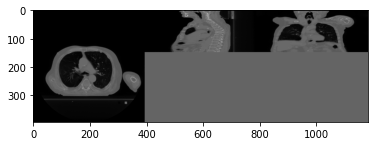

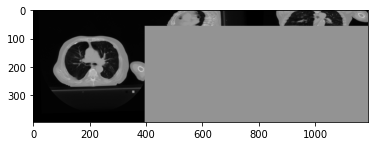

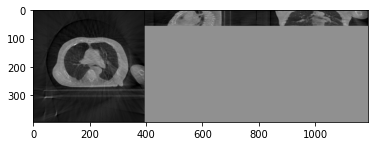

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 660) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 660) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 660) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13365702


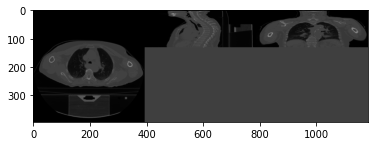

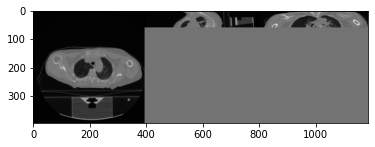

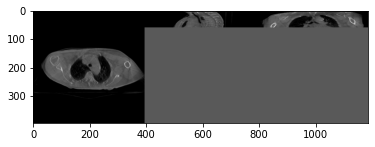

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 670) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 670) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 670) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13367522


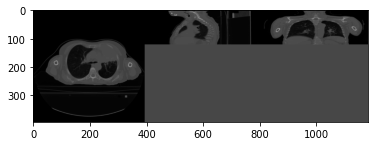

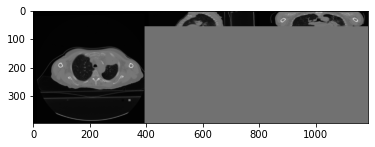

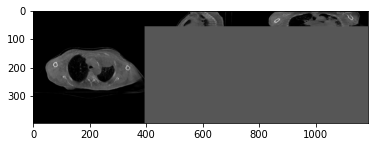

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 652) to (400, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 652) to (400, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 652) to (400, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13367533


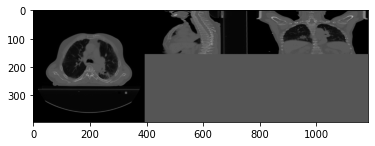

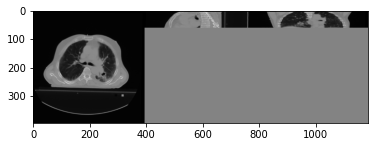

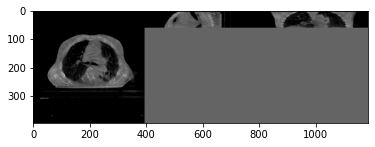

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 674) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 674) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 674) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13367565


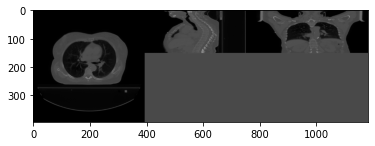

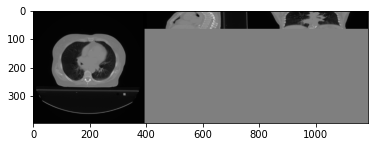

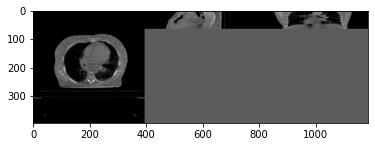

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 694) to (400, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 694) to (400, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 694) to (400, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13367923


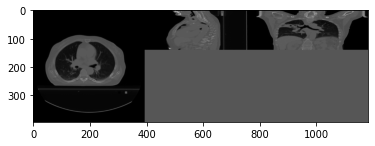

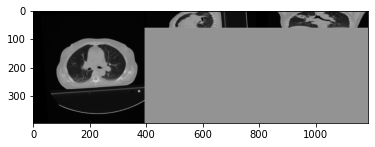

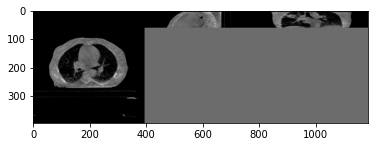

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 674) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 674) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 674) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13367924


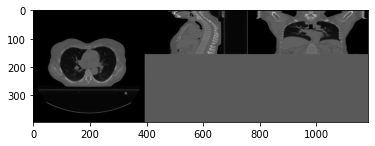

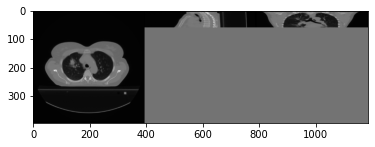

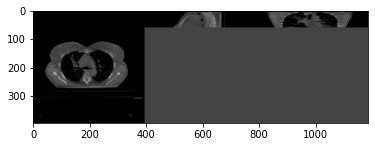

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 670) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 670) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 670) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13367986


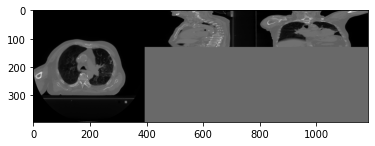

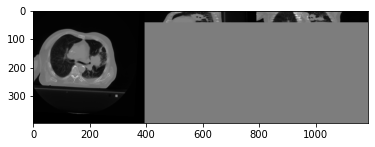

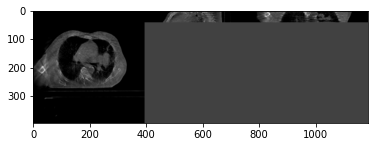

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 586) to (400, 592) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 586) to (400, 592) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 586) to (400, 592) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368195


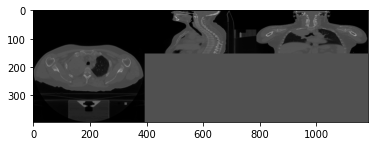

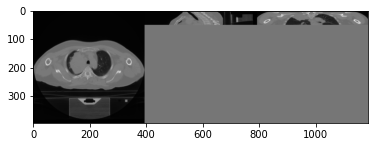

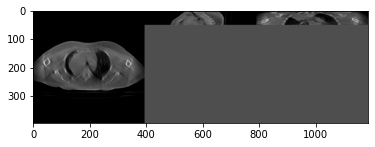

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368237


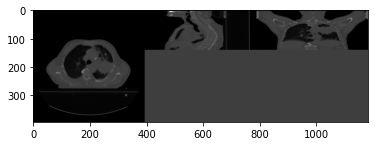

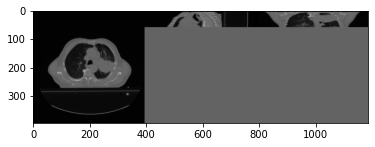

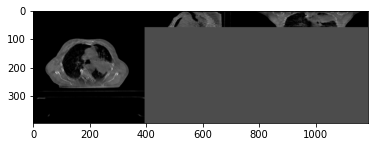

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368284


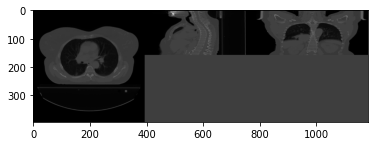

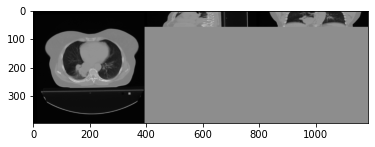

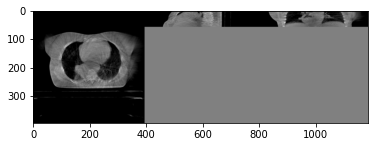

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 660) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 660) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 660) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368541


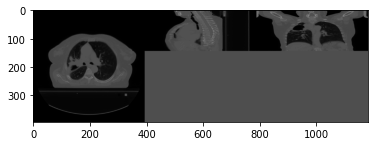

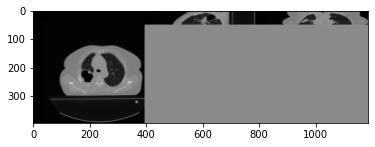

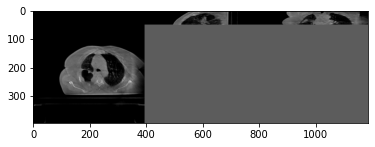

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 622) to (400, 624) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 622) to (400, 624) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 622) to (400, 624) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368543


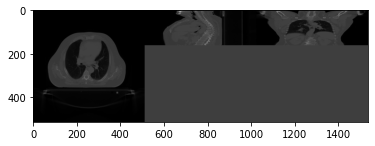

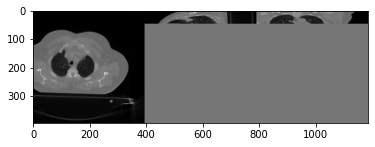

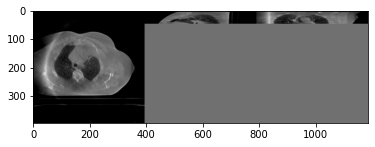

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 608) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 608) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 608) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368798


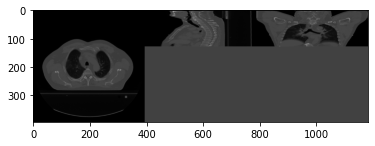

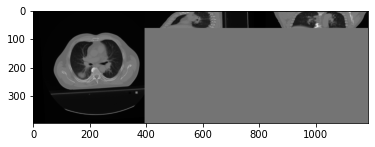

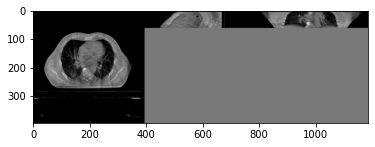

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 680) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 680) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 680) to (400, 688) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13368985


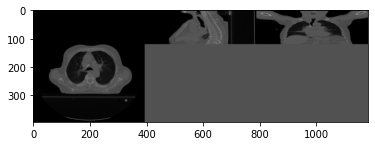

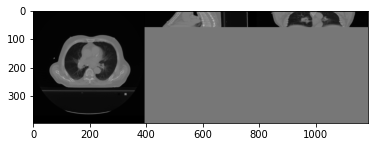

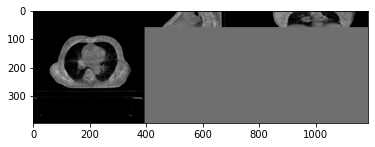

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13369049


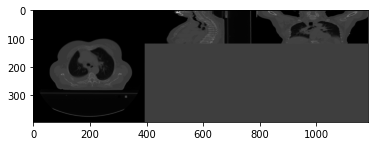

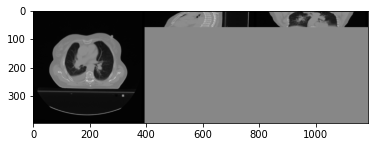

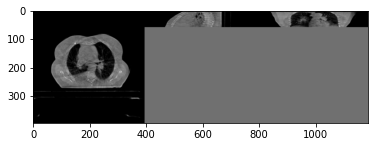

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13369085


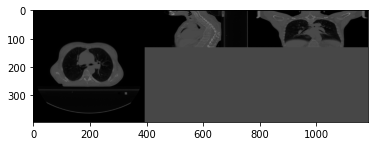

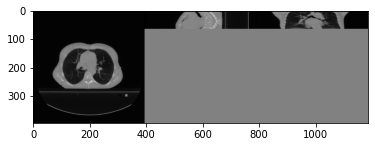

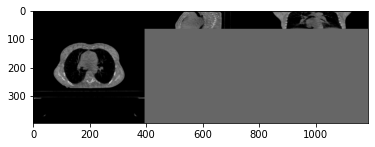

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 694) to (400, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 694) to (400, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 694) to (400, 704) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13369204


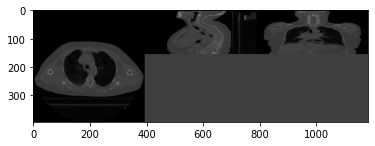

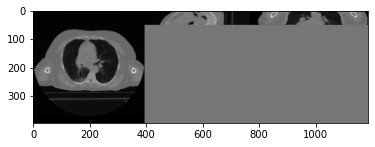

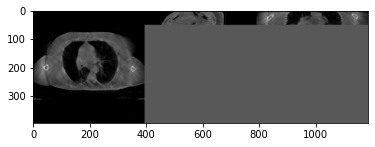

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13369293


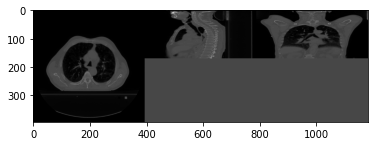

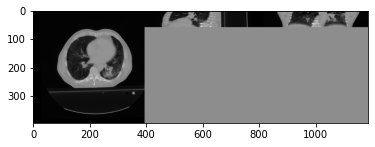

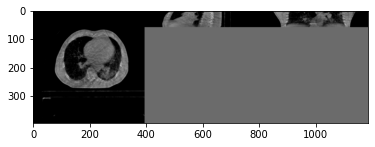

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 666) to (400, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima



P0439C0006I13369619


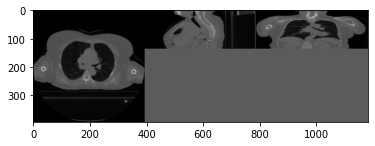

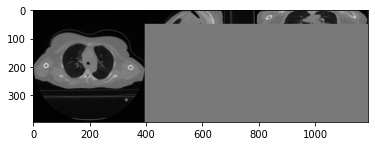

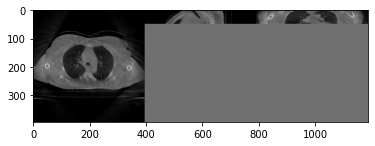

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (396, 628) to (400, 640) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
IMAGEIO FFMPEG_WRITER WARNING: input ima

In [11]:
in_folder = Path("/media/bro/brossd/maastro_data/pairs_nrrd_shortened/")
out_folder = Path("/media/bro/brossd/maastro_data/pairs_nrrd_registered_raystation_cbct/")

for patient in [x for x in in_folder.iterdir() if x.is_dir()]:
    patient_id = patient.name    
    # Get the registration matrix for this patient
    matrix = patient_matrix_dict_cbct[patient_id]
    # Patient 20 was the only one where CT was registered to sCT, so no need to invert the tranform there
    invert_transform = True #  patient_id != "P0439C0006I13365702" commenting out coz that is the case for sCT reg
    
    CBCT = sitk.ReadImage(str(list(patient.rglob("CBCT.nrrd"))[0]))
    CT = sitk.ReadImage(str(list(patient.rglob("CT.nrrd"))[0]))
    
    dpCT = register_using_raystation_matrix(CBCT, CT, matrix, invert_transform)
    
    # Visualization
    print(f"\n\n{patient_id}")
    plt.imshow(ops.get_image_preview(CT), cmap='gray')
    plt.show()
    plt.imshow(ops.get_image_preview(dpCT), cmap='gray')
    plt.show()
    plt.imshow(ops.get_image_preview(CBCT), cmap='gray')
    plt.show()
    
    # Saving
    out_dir = out_folder / patient.name
    out_dir.mkdir(parents=True, exist_ok=True)
    
    # Save CBCT, CT and deformed CT
    sitk.WriteImage(CBCT, str(out_dir / f"CBCT.nrrd"), True)
    sitk.WriteImage(CT, str(out_dir / f"CT.nrrd"), True)
    sitk.WriteImage(dpCT, str(out_dir / f"dpCT.nrrd"), True)
        
    viz = visualizer.Visualizer(outdir=out_dir, save_mode='image+video')
    viz.save_visualizations(CBCT, dpCT, checkerboard=True, overlay=True)
    